In [63]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/osama-bassam/healthcare-stroke-ML_model-/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)
df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
  display(df.describe() )

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [66]:
df.shape

(5110, 12)

In [67]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

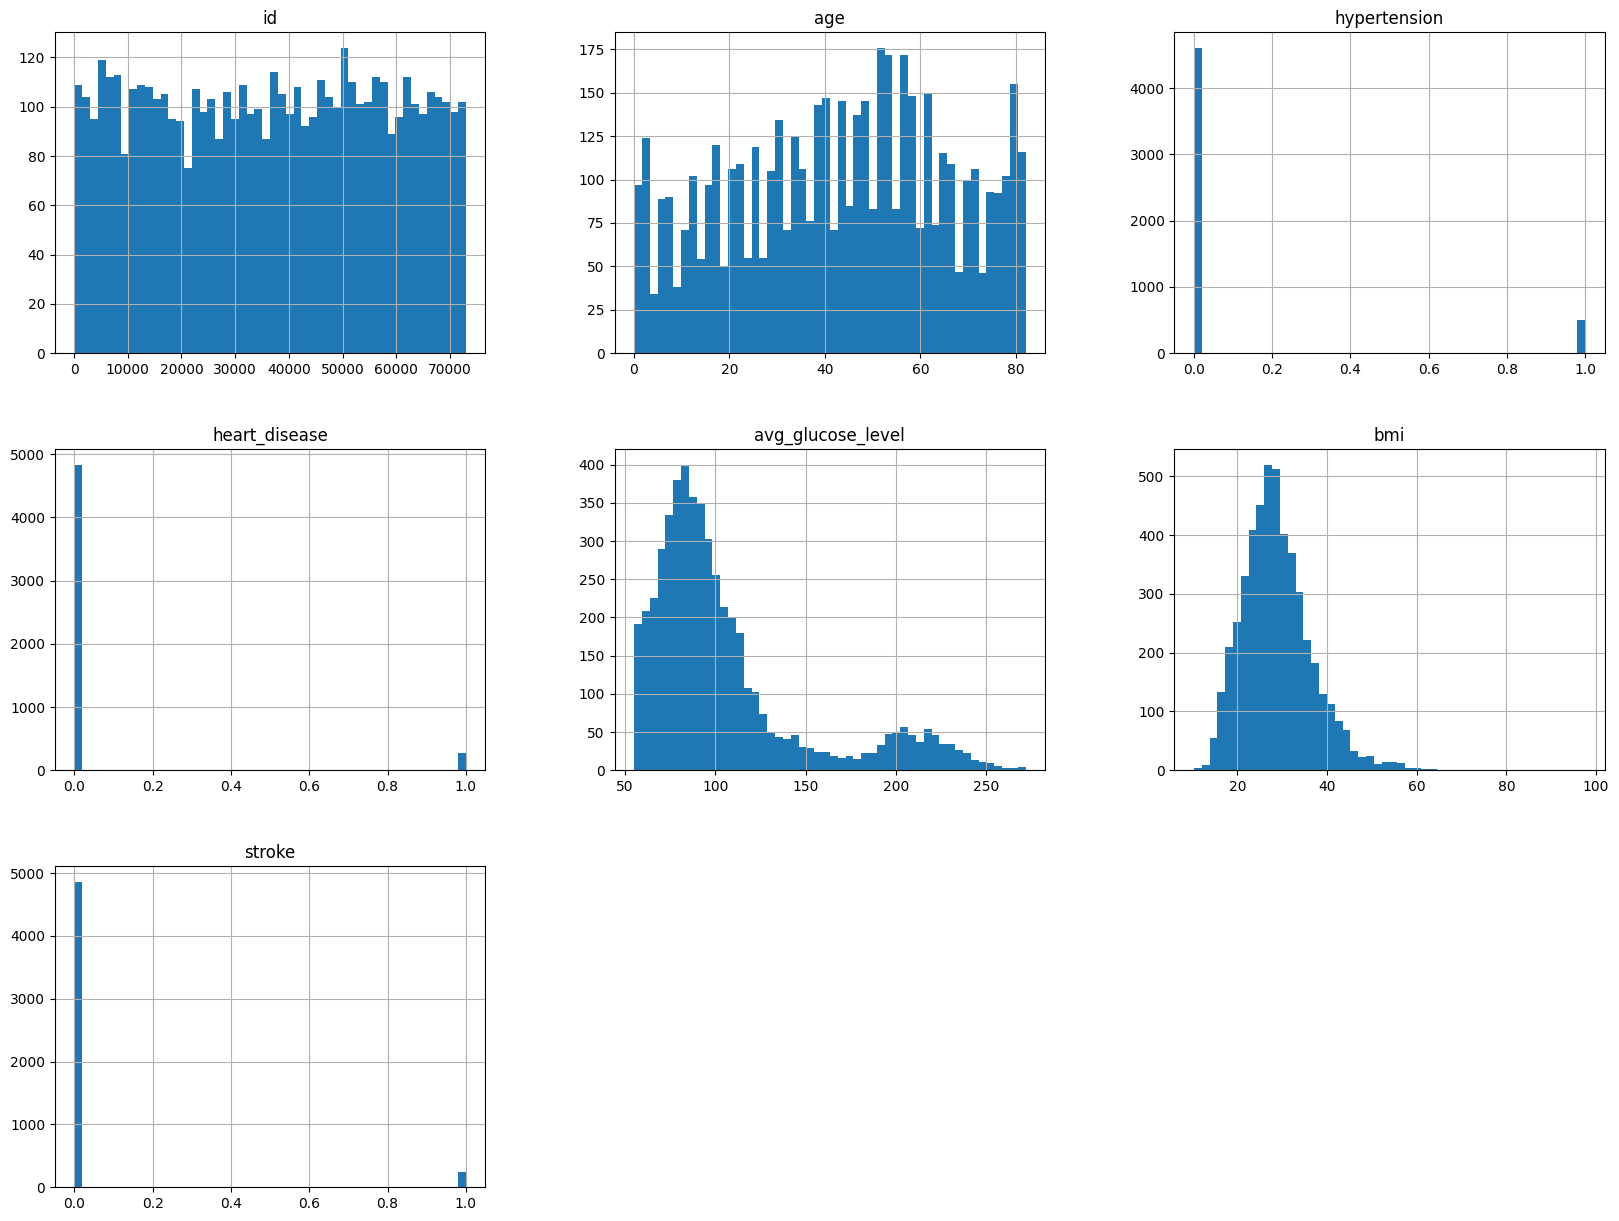

In [68]:
import matplotlib.pyplot  as plt
df.hist(figsize = (20,15),bins = 50)
plt.show()
#visualize the distribution of numerical data
#Histograms help in understanding the frequency distribution of data points
#X-axis (Horizontal Axis):
#The x-axis represents the range of values for the numeric variable being plotted.
#Y-axis (Vertical Axis):
#The y-axis represents the frequency or count of data points that fall within each bin.

In [69]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [71]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['bmi']] = imputer.fit_transform(df[['bmi']])


In [72]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [73]:
cat_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_map= pd.get_dummies(df, columns=cat_columns, dtype=int)
display(df_map.head(2))

'''in one-hot encoding, a new binary column is created for each unique category within a categorical variable.
 So, if a categorical variable has n unique categories, one-hot encoding will create n binary columns. Each binary column
 represents one category, with a value of 1 indicating that the observation belongs to that category and 0 indicating otherwise'''

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


'in one-hot encoding, a new binary column is created for each unique category within a categorical variable.\n So, if a categorical variable has n unique categories, one-hot encoding will create n binary columns. Each binary column\n represents one category, with a value of 1 indicating that the observation belongs to that category and 0 indicating otherwise'

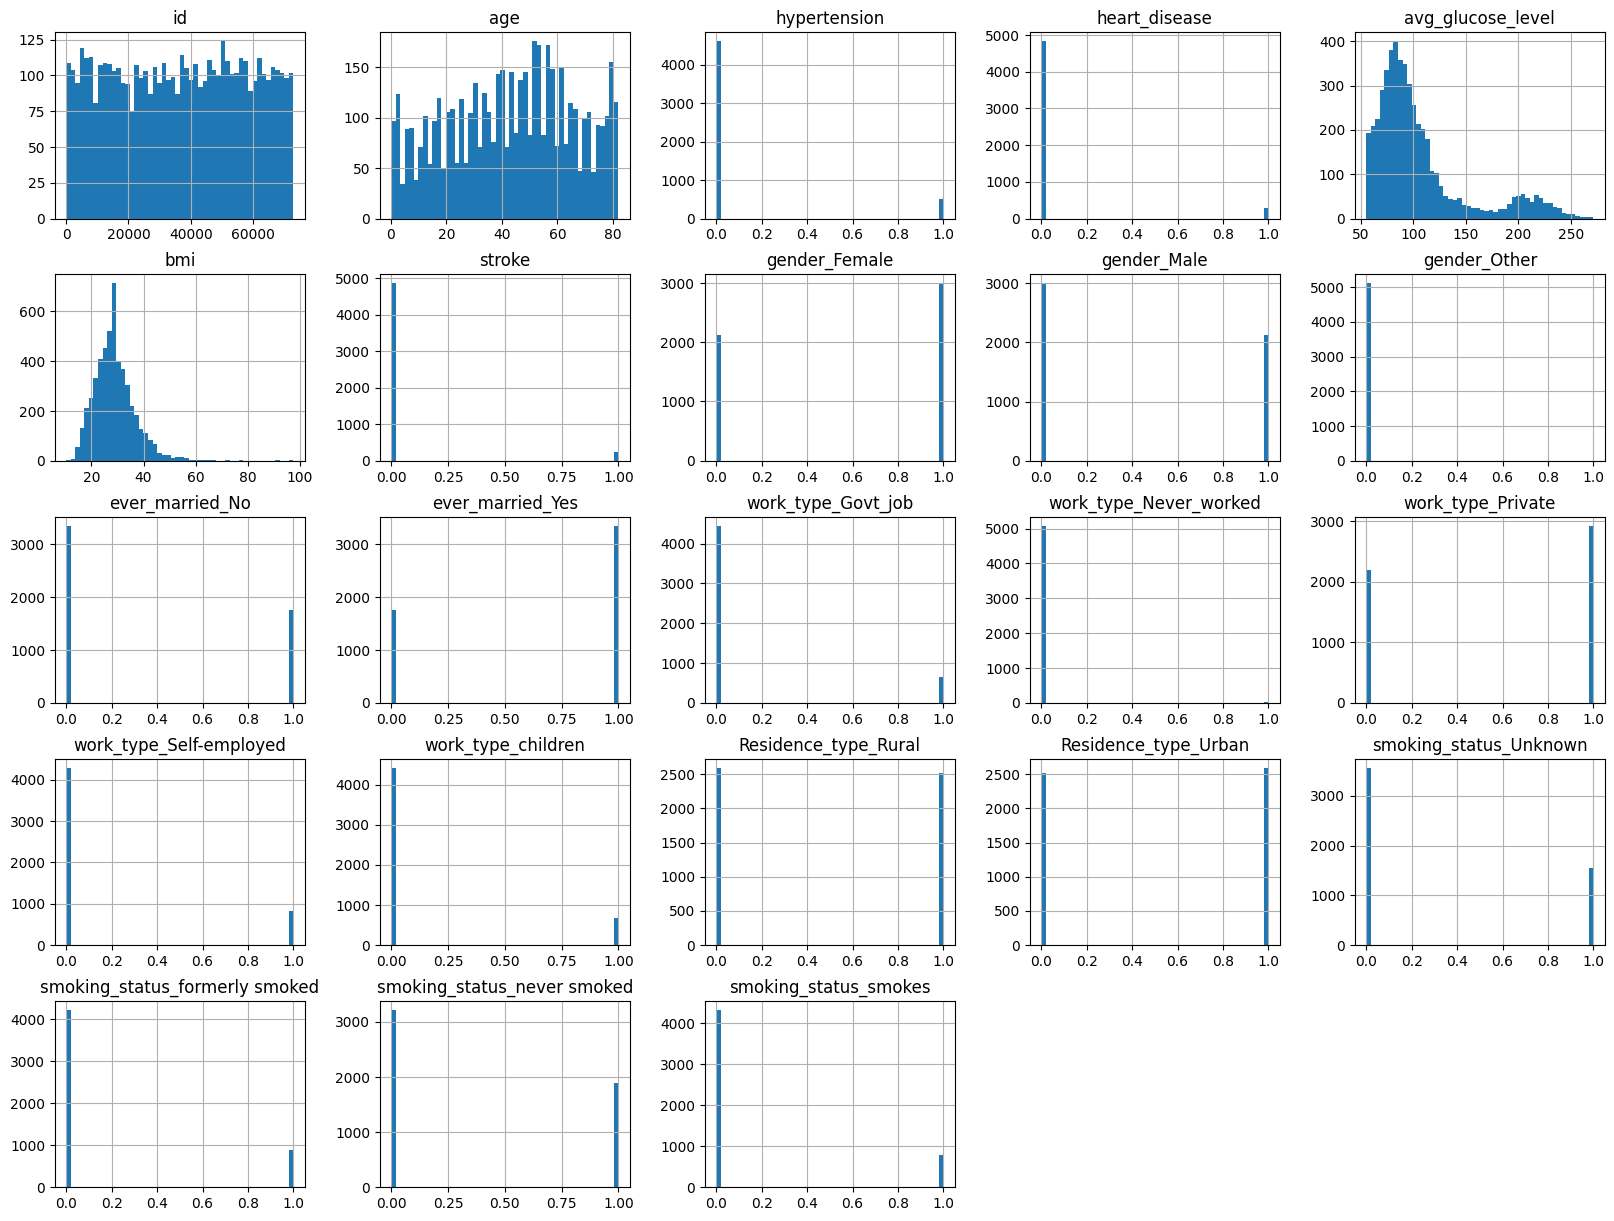

In [74]:
df_map.hist(figsize = (20,15),bins = 50)
plt.show()


In [75]:
from sklearn.preprocessing import MinMaxScaler
nmz_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = MinMaxScaler()

df_map[nmz_columns] = scaler.fit_transform(df[nmz_columns])

df_map.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.526692,0.097456,0.054012,0.235563,0.212981,0.048728,0.585910,0.413894,0.000196,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,21161.721625,0.276033,0.296607,0.226063,0.209046,0.088179,0.215320,0.492612,0.492578,0.013989,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.304199,0.000000,0.000000,0.102137,0.154639,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,0.548340,0.000000,0.000000,0.169721,0.207331,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,0.743652,0.000000,0.000000,0.272228,0.257732,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Standardization in statistics is necessary to ensure that data from different
 sources or measurement scales can be directly compared and combined. Without
 standardization, it would be difficult or impossible to compare or combine data
  from different sources, as the scales and units of measurement may be different.
  Standardization also makes it possible to compare data from different populations
  and to identify patterns and trends in the data. Additionally, standardization is
   often a prerequisite for many statistical techniques, such as parametric tests and linear regression.**

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_map[nmz_columns] = scaler.fit_transform(df[nmz_columns])

df_map[nmz_columns].head(2)

,age,avg_glucose_level,bmi
0,1.051434,2.706375,1.001234e+00
1,0.786070,2.121559,4.615554e-16


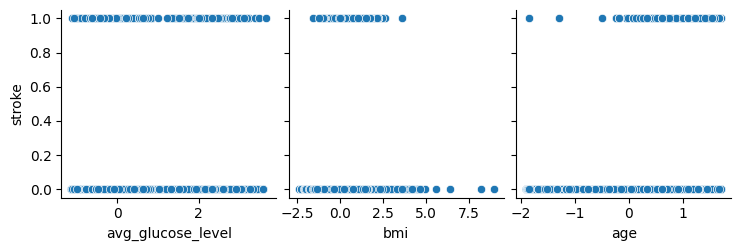

'\n1. Identify Relationships and Patterns\n2. Detect Outliers\n3. Understand Distributions\n4. Feature Engineering\n5. Correlation Analysis\n6. Data Visualization\n'

In [77]:
import seaborn as sns
sns.pairplot(df_map, x_vars=["avg_glucose_level","bmi","age"], y_vars=["stroke"])
plt.show()
#Using sns.pairplot to visualize the relationships between numeric
#features (avg_glucose_level, bmi, age) and the target variable (stroke)
#this help me to :
'''
1. Identify Relationships and Patterns
2. Detect Outliers
3. Understand Distributions
4. Feature Engineering
5. Correlation Analysis
6. Data Visualization
'''

In [78]:
corr_matrix = df_map.corr()


corr_with_target = corr_matrix["stroke"].drop(labels=["stroke"])
columns_to_drop = corr_with_target[(corr_with_target > -0.11) & (corr_with_target < 0.11)].index.tolist()
# I found that if any feature have correlation with target between -0.11% & 0.11% is not really useful
# and its make some noise ,so i prefer to drop it


new_df = df_map.drop(columns=columns_to_drop)


print("Correlation values with 'stroke':\n", corr_with_target)
columns_to_drop_df = pd.DataFrame(columns_to_drop, columns=['Columns to Drop'])
print("\nColumns to drop (correlation close to zero):\n")
print(columns_to_drop_df)

Correlation values with 'stroke':
 id                                0.006388
age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945
bmi                               0.038947
gender_Female                    -0.009027
gender_Male                       0.009117
gender_Other                     -0.003166
ever_married_No                  -0.108340
ever_married_Yes                  0.108340
work_type_Govt_job                0.002677
work_type_Never_worked           -0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children               -0.083869
Residence_type_Rural             -0.015458
Residence_type_Urban              0.015458
smoking_status_Unknown           -0.055892
smoking_status_formerly smoked    0.064556
smoking_status_never smoked      -0.004129
smoking_status_smokes             0.008939
Name: stroke, dtype

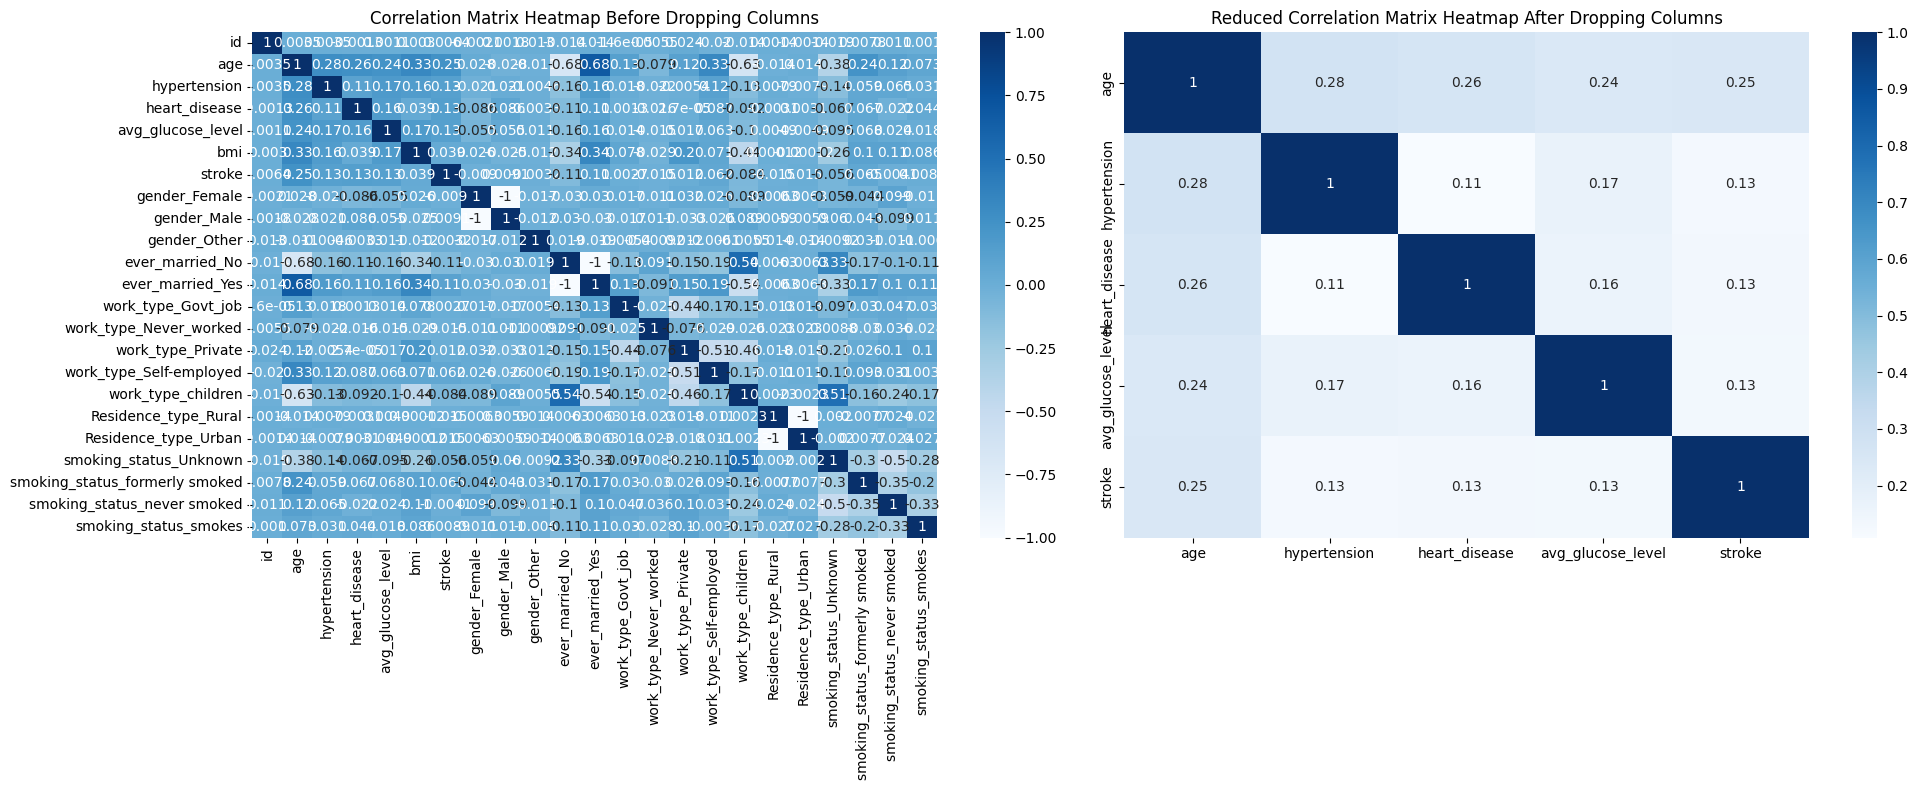

In [79]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

# Plot correlation matrix heatmap before dropping columns
sns.heatmap(df_map.corr(), annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Correlation Matrix Heatmap Before Dropping Columns')

# Plot correlation matrix heatmap after dropping columns
sns.heatmap(new_df.corr(), annot=True, cmap='Blues', ax=axes[1])
axes[1].set_title('Reduced Correlation Matrix Heatmap After Dropping Columns')

# Adjust layout to ensure titles and labels fit
plt.tight_layout()

# Show the plots
plt.show()


# ***OVER & UNDER sampling***

 **Both techniques aim to address the issue of class imbalance and
improve the performance of machine learning models,
The choice between under and over sampling depends on the specific characteristics of the dataset and the goals of the analysis** *italicized text*

In [80]:
class_distribution = new_df['stroke'].value_counts()
print(class_distribution)

stroke
0    4861
1     249
Name: count, dtype: int64


In [81]:
new_df2 = new_df.copy()

In [82]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
X = new_df2.drop('stroke', axis=1)
y = new_df2['stroke']
print("Original class distribution:\n", y.value_counts())

Original class distribution:
 stroke
0    4861
1     249
Name: count, dtype: int64


In [83]:
# oversampling
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X, y)
print("\noversampling:" , pd.Series(y_res_smote).value_counts())


oversampling: stroke
1    4861
0    4861
Name: count, dtype: int64


In [84]:
#undersampling
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X, y)
print("\nRandomUnderSampler:" , pd.Series(y_res_rus).value_counts())


RandomUnderSampler: stroke
0    249
1    249
Name: count, dtype: int64


In [85]:
X = new_df.drop('stroke', axis=1)
y = new_df['stroke']
smote_enn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X, y)

print("\nSMOTEENN class distribution:\n", pd.Series(y_resampled_smoteenn).value_counts())
#SMOTE-ENN is a combination of over-sampling (SMOTE) and under-sampling (ENN) techniques.
#It first applies SMOTE to generate synthetic samples for the minority class and then removes samples using ENN.
#It first applies SMOTE to generate synthetic samples for the minority class and then removes samples using ENN
#(SMOTE) :Synthetic Minority Over-sampling Technique
#(ENN)   :Edited Nearest Neighbors


SMOTEENN class distribution:
 stroke
1    3530
0    3496
Name: count, dtype: int64


In [86]:
df_resampled = pd.DataFrame(X_resampled_smoteenn, columns=X.columns)
df_resampled['stroke'] = y_resampled_smoteenn

In [87]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

#resources:
#bagging:  https://www.geeksforgeeks.org/ml-bagging-classifier/
#boosting : https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

X = df_resampled.drop('stroke', axis=1)

y = df_resampled['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [88]:
bagging_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

bagging_predictions = bagging_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# resources
# classification matrix : https://www.geeksforgeeks.org/sklearn-classification-metrics/
bagging_matrix = confusion_matrix(y_test, bagging_predictions)
random_forest_matrix = confusion_matrix(y_test, random_forest_predictions)
display(bagging_matrix,random_forest_matrix)

array([[708,  10],
       [  7, 681]])

array([[713,   5],
       [  7, 681]])

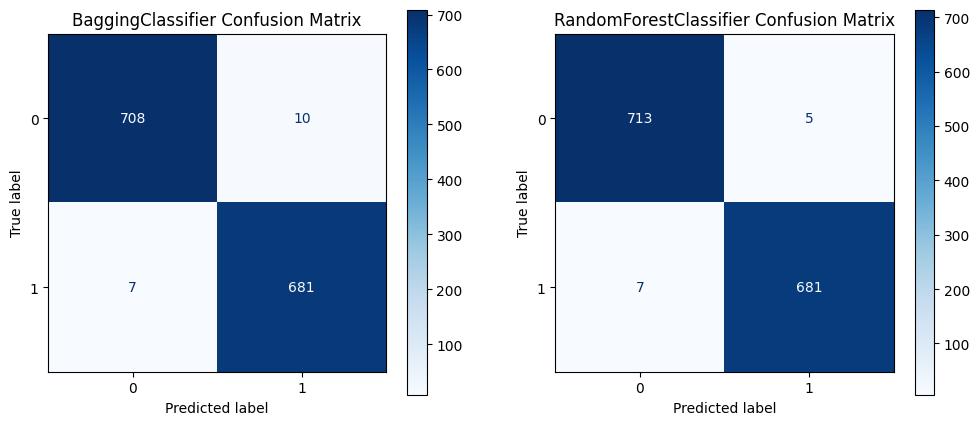

In [90]:
#draw the confution matrix
confution_m_display_bag = ConfusionMatrixDisplay(confusion_matrix=bagging_matrix, display_labels=[0, 1])
confution_m_display_random_forest = ConfusionMatrixDisplay(confusion_matrix=random_forest_matrix, display_labels=[0, 1])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

confution_m_display_bag.plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('BaggingClassifier Confusion Matrix')
confution_m_display_random_forest.plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title('RandomForestClassifier Confusion Matrix')

plt.show()

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Bagging": bagging_predictions,
    "Boosting": random_forest_predictions
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    print(f"{model_name} Model Metrics:")
    print("-" * 20)
    print("Accuracy:", accuracy)
    print("-" * 20)
    print("Precision:", precision)
    print("-" * 20)
    print("Recall:", recall)
    print("-" * 20)
    print("F1-score:", f1)
    print("-" * 20)
    print("AUC:", auc)
    print("-" * 50)


Bagging Model Metrics:
--------------------
Accuracy: 0.9879089615931721
--------------------
Precision: 0.9855282199710564
--------------------
Recall: 0.9898255813953488
--------------------
F1-score: 0.9876722262509063
--------------------
AUC: 0.9879490023968388
--------------------------------------------------
Boosting Model Metrics:
--------------------
Accuracy: 0.9914651493598862
--------------------
Precision: 0.9927113702623906
--------------------
Recall: 0.9898255813953488
--------------------
F1-score: 0.9912663755458515
--------------------
AUC: 0.9914308965472566
--------------------------------------------------


# **Optimizing the model **

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grids for Bagging and Random Forest models
bagging_param_grid = {
    'n_estimators': [100,200],
    # For a Bagging or Random Forest model, these base estimators are typically decision trees,
    # highst may capture all the patterns in the data, resulting in upper accuracy.
    # lowest may not capture all the patterns in the data, potentially resulting in lower accuracy.
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.8, 0.9, 1.0],

}

random_forest_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10,40, 50],
    'min_samples_split': [2,10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],


}

#------------------------------------------------------------------------------------------------------------------------
# * n_estimators: This key corresponds to the number of base estimators in the ensemble.
#   The grid search will try values 50, 100, and 200.
#   Additional context: More estimators can improve performance but also increase computation time.
#------------------------------------------------------------------------------------------------------------------------
# * max_samples: This key corresponds to the maximum number or fraction of samples to be drawn
#   from the original dataset to train each base estimator. The grid search will try values 0.5, 0.7, and 1.0.
#   Additional context: Lower values can reduce overfitting, but too low might lead to underfitting.
#------------------------------------------------------------------------------------------------------------------------
# * max_features: This key corresponds to the maximum number or fraction of features to be drawn
#   from the original feature set to train each base estimator. The grid search will try values 0.5, 0.7, and 1.0.
#   Additional context: Controls the randomness of each base estimator, affecting the diversity of the ensemble.

# Initialize models
bagging_model = BaggingClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Bagging model
bagging_grid_search = GridSearchCV(bagging_model, bagging_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
bagging_grid_search.fit(X_train, y_train)
# n_jobs=-1: Utilize all available CPU cores for parallel processing.

# Initialize GridSearchCV for Random Forest model
random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_param_grid, cv=8, scoring='accuracy', n_jobs=-1)
random_forest_grid_search.fit(X_train, y_train)
'''random_forest_param_grid: This is a dictionary specifying the hyperparameters
and the values to be tested during the grid search.
cv=3: This parameter specifies the number of cross-validation folds to be
used during the grid search. In this case, it's set to 3, meaning the data
will be split into 3 parts for cross-validation. Using more folds, like 5 or 10, can provide a better estimate of model performance but increases computation time.
scoring='accuracy': This parameter specifies the evaluation metric to be used
for model selection. Here, 'accuracy' is used, which measures the fraction
of correctly classified samples. Depending on the problem, other metrics like 'f1' or 'roc_auc' might be more appropriate.
n_jobs=-1: This parameter specifies the number of jobs to run in parallel during
the grid search. Setting it to -1 means using all available processors. This can significantly speed up the grid search process.'''

# Get best parameters for Bagging and Random Forest models
best_bagging_params = bagging_grid_search.best_params_
best_random_forest_params = random_forest_grid_search.best_params_

print("Best parameters for Bagging model:", best_bagging_params)
print("Best parameters for Random Forest model:", best_random_forest_params)

# Fit models with best parameters
best_bagging_model = BaggingClassifier(**best_bagging_params, random_state=42)
best_random_forest_model = RandomForestClassifier(**best_random_forest_params, random_state=42)

best_bagging_model.fit(X_train, y_train)
best_random_forest_model.fit(X_train, y_train)

# Make predictions with optimized models
best_bagging_predictions = best_bagging_model.predict(X_test)
best_random_forest_predictions = best_random_forest_model.predict(X_test)

# Evaluate optimized models
best_bagging_accuracy = accuracy_score(y_test, best_bagging_predictions)
best_random_forest_accuracy = accuracy_score(y_test, best_random_forest_predictions)

print("Best Bagging model accuracy:", best_bagging_accuracy)
print("Best Random Forest model accuracy:", best_random_forest_accuracy)


In [ ]:
display(best_bagging_params,best_random_forest_params)

In [ ]:
print("\nOptimized Bagging Model Accuracy:", best_bagging_accuracy)
print("Optimized Random Forest Model Accuracy:", best_random_forest_accuracy)


In [ ]:
optimized_bagging_matrix = confusion_matrix(y_test, best_bagging_predictions)
optimized_random_forest_matrix = confusion_matrix(y_test, best_random_forest_predictions)
display(optimized_bagging_matrix,optimized_random_forest_matrix)

In [ ]:
#draw the confution matrix
confution_m_display_bag = ConfusionMatrixDisplay(confusion_matrix=optimized_bagging_matrix, display_labels=[0, 1])
confution_m_display_random_forest = ConfusionMatrixDisplay(confusion_matrix=optimized_random_forest_matrix, display_labels=[0, 1])

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

confution_m_display_bag.plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('Optimized BaggingClassifier Confusion Matrix')

confution_m_display_random_forest.plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title('Optimized RandomForestClassifier Confusion Matrix')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Bagging": best_bagging_predictions,
    "Boosting": best_random_forest_predictions
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    print(f"{model_name} Model Metrics:")
    print("-" * 20)
    print("Accuracy:", accuracy)
    print("-" * 20)
    print("Precision:", precision)
    print("-" * 20)
    print("Recall:", recall)
    print("-" * 20)
    print("F1-score:", f1)
    print("-" * 20)
    print("AUC:", auc)
    print("-" * 50)